# Cabify Challenge



In [1]:
# import

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

In [2]:
# Open data from excel

filename = 'Cabify_2010.xlsx'
input_folder = 'input'
output_folder = 'output'

df = pd.read_excel(os.path.join(input_folder, filename))
df.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type            start_at  start_lat  start_lon  \
0  executive       asap 2010-11-16 16:44:52 -12.139835 -77.023560   
1  executive       asap 2010-06-01 00:34:38 -12.138748 -76.995361   
2  executive       asap 2010-05-31 05:01:24 -12.124531 -77.027802   
3  executive       asap 2010-06-01 00:29:30 -12.138851 -76.995300   
4  executive   reserved 2010-09-11 23:55:00 -12.089954 -76.926270   

               end_at     ...       price_distance  price_duration distance  \
0 2010-11-16 17:29:57     ...               3626.0           195.0  11331.0   
1 2010-06-01 00:37:39     ...                  NaN             NaN      0.0   
2 2010-05-31 05:04:34     ...                  NaN             NaN      0.0   
3 2010-06-01 00:32:35     ...                  NaN             NaN      0.0   
4 2010-09-12 01:07:02     ...               7665.0           562.0  30270.0   

   duration    cost cost_distance cost_duration  source  driver_score  \
0     234.0     0.0           0.0           0.0  iPhone           5.0   
1       0.0     0.0           NaN           NaN  iPhone           NaN   
2       0.0     0.0           NaN           NaN  iPhone           NaN   
3       0.0     0.0           NaN           NaN  iPhone           NaN   
4     715.0  6173.0        5756.0         417.0  iPhone           4.0   

   rider_score  
0          5.0  
1          NaN  
2          NaN  
3          NaN  
4          5.0  

[5 rows x 28 columns]

## Análisis exploratorio de los datos

### Tipos de datos



In [3]:
df.dtypes

# Se aprecia que todos los tipos de datos de las columnas están correctos. 

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                  float64
start_lon                  float64
end_at              datetime64[ns]
end_lat                    float64
end_lon                    float64
end_state                   object
driver_start_lat           float64
driver_start_lon           float64
arrived_at          datetime64[ns]
currency                    object
price                      float64
price_distance             float64
price_duration             float64
distance                   float64
duration                   float64
cost                       float64
cost_distance              float64
cost_duration              float64
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [4]:
df.columns

# Los nombres de las columnas están sin erratas

Index(['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
       'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon',
       'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at',
       'currency', 'price', 'price_distance', 'price_duration', 'distance',
       'duration', 'cost', 'cost_distance', 'cost_duration', 'source',
       'driver_score', 'rider_score'],
      dtype='object')

In [5]:
df.describe()

start_lat     start_lon       end_lat       end_lon  \
count  23111.000000  23111.000000  23111.000000  23111.000000   
mean     -12.103147    -77.017403    -11.915830    -76.886846   
std        0.037762      0.040164      3.078996      4.526540   
min      -12.805166    -77.164398    -54.815255   -132.359722   
25%      -12.117747    -77.038236    -12.117500    -77.040527   
50%      -12.104050    -77.024811    -12.100033    -77.027519   
75%      -12.093198    -76.992192    -12.086361    -76.999268   
max      -11.889502    -76.564199     57.475555    140.487690   

       driver_start_lat  driver_start_lon         price  price_distance  \
count      19621.000000      19621.000000  22713.000000    1.994100e+04   
mean         -11.700769        -74.436309   2752.738784    3.404748e+03   
std            2.186765         13.858433   3025.390309    4.851010e+04   
min          -34.593857        -77.158675      0.000000    0.000000e+00   
25%          -12.116378        -77.035746   1700.000000    8.270000e+02   
50%          -12.105593        -77.024110   1911.000000    1.754000e+03   
75%          -12.094615        -76.994058   3597.000000    3.256000e+03   
max            0.000000          0.000000  55974.000000    4.491910e+06   

       price_duration      distance      duration           cost  \
count    19941.000000  2.284800e+04  22848.000000   21760.000000   
mean       606.005617  1.088395e+04    638.831145    2655.032445   
std       1553.548938  2.025735e+05   1788.661444   17124.801935   
min          0.000000  0.000000e+00      0.000000       0.000000   
25%         30.000000  0.000000e+00      0.000000       0.000000   
50%        247.000000  4.660000e+03    218.000000    1450.000000   
75%        628.000000  9.290250e+03    667.000000    2381.250000   
max      69839.000000  1.403722e+07  83807.000000  525000.000000   

       cost_distance  cost_duration  driver_score   rider_score  
count   1.803800e+04   18038.000000   7650.000000  15390.000000  
mean    2.099408e+03     401.550504      3.933333      4.755491  
std     3.300314e+04    1148.614398      1.744948      0.840558  
min     0.000000e+00       0.000000      0.000000      0.000000  
25%     0.000000e+00       0.000000      4.000000      5.000000  
50%     1.048000e+03     127.000000      5.000000      5.000000  
75%     2.230000e+03     414.000000      5.000000      5.000000  
max     3.368792e+06   48887.000000      5.000000      5.000000

In [6]:
df.nunique()

# Todos los valores distintos de cada columna. 

journey_id          23111
user_id              1390
driver_id             168
taxi_id               213
icon                    3
start_type              3
start_at            21724
start_lat           11761
start_lon            8494
end_at              22813
end_lat             12280
end_lon              9090
end_state               6
driver_start_lat    18475
driver_start_lon    18352
arrived_at          17706
currency                1
price                5456
price_distance       5778
price_duration       2676
distance             8392
duration             2958
cost                 4098
cost_distance        4625
cost_duration        2060
source                  5
driver_score            6
rider_score             6
dtype: int64

In [7]:
# Contamos los nulos de cada columna

df.isnull().sum()

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
currency                0
price                 398
price_distance       3170
price_duration       3170
distance              263
duration              263
cost                 1351
cost_distance        5073
cost_duration        5073
source                123
driver_score        15461
rider_score          7721
dtype: int64

In [8]:
# Hay muchos nulos en el dataset. La mayoría debidos a viajes incompletos. 
# Más adelante se verá que hacer con estos casos

## Analisis temporal. 

Hacemos una agregación tipo 'count' agrupando por día de la semana


journey_id  user_id  driver_id  taxi_id  icon  start_type  \
start_at                                                               
Monday           3110     3110       3110     3110  3110        3110   
Tuesday          2087     2087       2087     2087  2087        2087   
Wednesday        1561     1561       1561     1561  1561        1561   
Thursday         2451     2451       2451     2451  2451        2451   
Friday           2554     2554       2554     2554  2554        2554   
Saturday         2774     2774       2774     2774  2774        2774   
Sunday           2880     2880       2880     2880  2880        2880   

           start_at  start_lat  start_lon  end_at     ...       \
start_at                                              ...        
Monday         3110       3110       3110    3110     ...        
Tuesday        2087       2087       2087    2085     ...        
Wednesday      1561       1561       1561    1561     ...        
Thursday       2451       2451       2451    2451     ...        
Friday         2554       2554       2554    2552     ...        
Saturday       2774       2774       2774    2774     ...        
Sunday         2880       2880       2880    2880     ...        

           price_distance  price_duration  distance  duration  cost  \
start_at                                                              
Monday               3110            3110      3110      3110  2943   
Tuesday              2087            2087      2087      2087  1987   
Wednesday            1561            1561      1561      1561  1488   
Thursday             2451            2451      2451      2451  2315   
Friday               2554            2554      2554      2554  2400   
Saturday             2773            2773      2774      2774  2597   
Sunday               2880            2880      2880      2880  2715   

           cost_distance  cost_duration  source  driver_score  rider_score  
start_at                                                                    
Monday              2791           2791    3094          1309         2738  
Tuesday             1893           1893    2079           934         1900  
Wednesday           1369           1369    1552           703         1444  
Thursday            2198           2198    2435          1021         2185  
Friday              2293           2293    2533          1118         2239  
Saturday            2449           2449    2763          1293         2404  
Sunday              2550           2550    2864          1272         2480  

[7 rows x 28 columns]

Hacemos una agregación tipo 'mean' agrupando por día de la semana.


start_lat  start_lon    end_lat    end_lon  driver_start_lat  \
start_at                                                                  
Monday    -12.102841 -77.019158 -11.954385 -76.999440        -11.728648   
Tuesday   -12.105479 -77.019026 -12.011287 -76.835513        -11.947764   
Wednesday -12.111169 -77.016149 -12.004404 -76.876935        -12.076544   
Thursday  -12.099476 -77.016249 -11.819461 -77.013216        -11.577535   
Friday    -12.102217 -77.016694 -11.934750 -77.064257        -11.509478   
Saturday  -12.102615 -77.016400 -11.922161 -76.861975        -11.551572   
Sunday    -12.101811 -77.018199 -11.862214 -76.689178        -11.705160   

           driver_start_lon        price  price_distance  price_duration  \
start_at                                                                   
Monday           -74.597116  3578.213183     2691.367524      733.589389   
Tuesday          -75.959630  3778.754554     3070.992813      588.686632   
Wednesday        -76.760894  4006.629250     3338.093530      515.351057   
Thursday         -73.688083  3557.223174     3995.933905      693.602611   
Friday           -73.228471  3340.806894     3069.567345      678.232185   
Saturday         -73.502768  3419.784427     6464.134872      769.978002   
Sunday           -74.485039  3478.833623     4277.193056      698.511111   

               distance    duration         cost  cost_distance  \
start_at                                                          
Monday      8403.557878  879.713183  3078.205233    1751.577929   
Tuesday     9613.701006  710.309056  3560.706593    2092.500792   
Wednesday  10515.108264  619.251121  3929.501344    2269.861943   
Thursday   15469.218278  840.867809  3855.081210    2215.720655   
Friday     11105.185591  822.611981  2593.238750    1540.670737   
Saturday   25384.648522  937.717376  4410.855988    3903.108616   
Sunday     17115.295139  842.051736  3182.094659    3111.229412   

           cost_duration  driver_score  rider_score  
start_at                                             
Monday        491.840559      3.892284     4.738860  
Tuesday       423.037507      3.960385     4.735263  
Wednesday     358.959825      3.953058     4.694598  
Thursday      439.754777      3.947111     4.761098  
Friday        444.469690      3.882826     4.779812  
Saturday      527.194773      3.996906     4.788270  
Sunday        471.653725      3.913522     4.766129

Tabla de uso de días de la semana contra horas del día


quantity                                           ...             \
hour            0    1    2    3    4    5    6   7   8   9  ...    14   15   
day                                                          ...              
Monday         192  149  133  121  115   73   46  30  24  14 ...   200  158   
Tuesday        182  213  180  140  137  132  114  73  75  33 ...    41   52   
Wednesday      125  159  156  115  118  107  102  94  67  64 ...    17   27   
Thursday        56   51   62   53   41   18    8   8  11  12 ...   178  160   
Friday         138   94   66   74   34   16   12   9   4  14 ...   198  165   
Saturday       133  117   97   67   64   34   22  14  12  15 ...   209  176   
Sunday         176  173   80   96   57   40   18  18   6  19 ...   209  161   

                                                   
hour        16   17   18   19   20   21   22   23  
day                                                
Monday     129  138  124  128  152  169  220  246  
Tuesday     58   77   53   52   55   76   89   99  
Wednesday   30   40   23   38   37   44   49   57  
Thursday   128  120   94  134  150  147  205  256  
Friday     116  129  109  120  158  127  162  246  
Saturday   141  127  114  132  138  148  212  259  
Sunday     103  137  103  121  158  147  192  258  

[7 rows x 24 columns]

Gráficas del uso de la aplicación a lo largo de los días de la semana
expresado en número total de viajes cada hora de cada día de la semana


/home/alberto/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


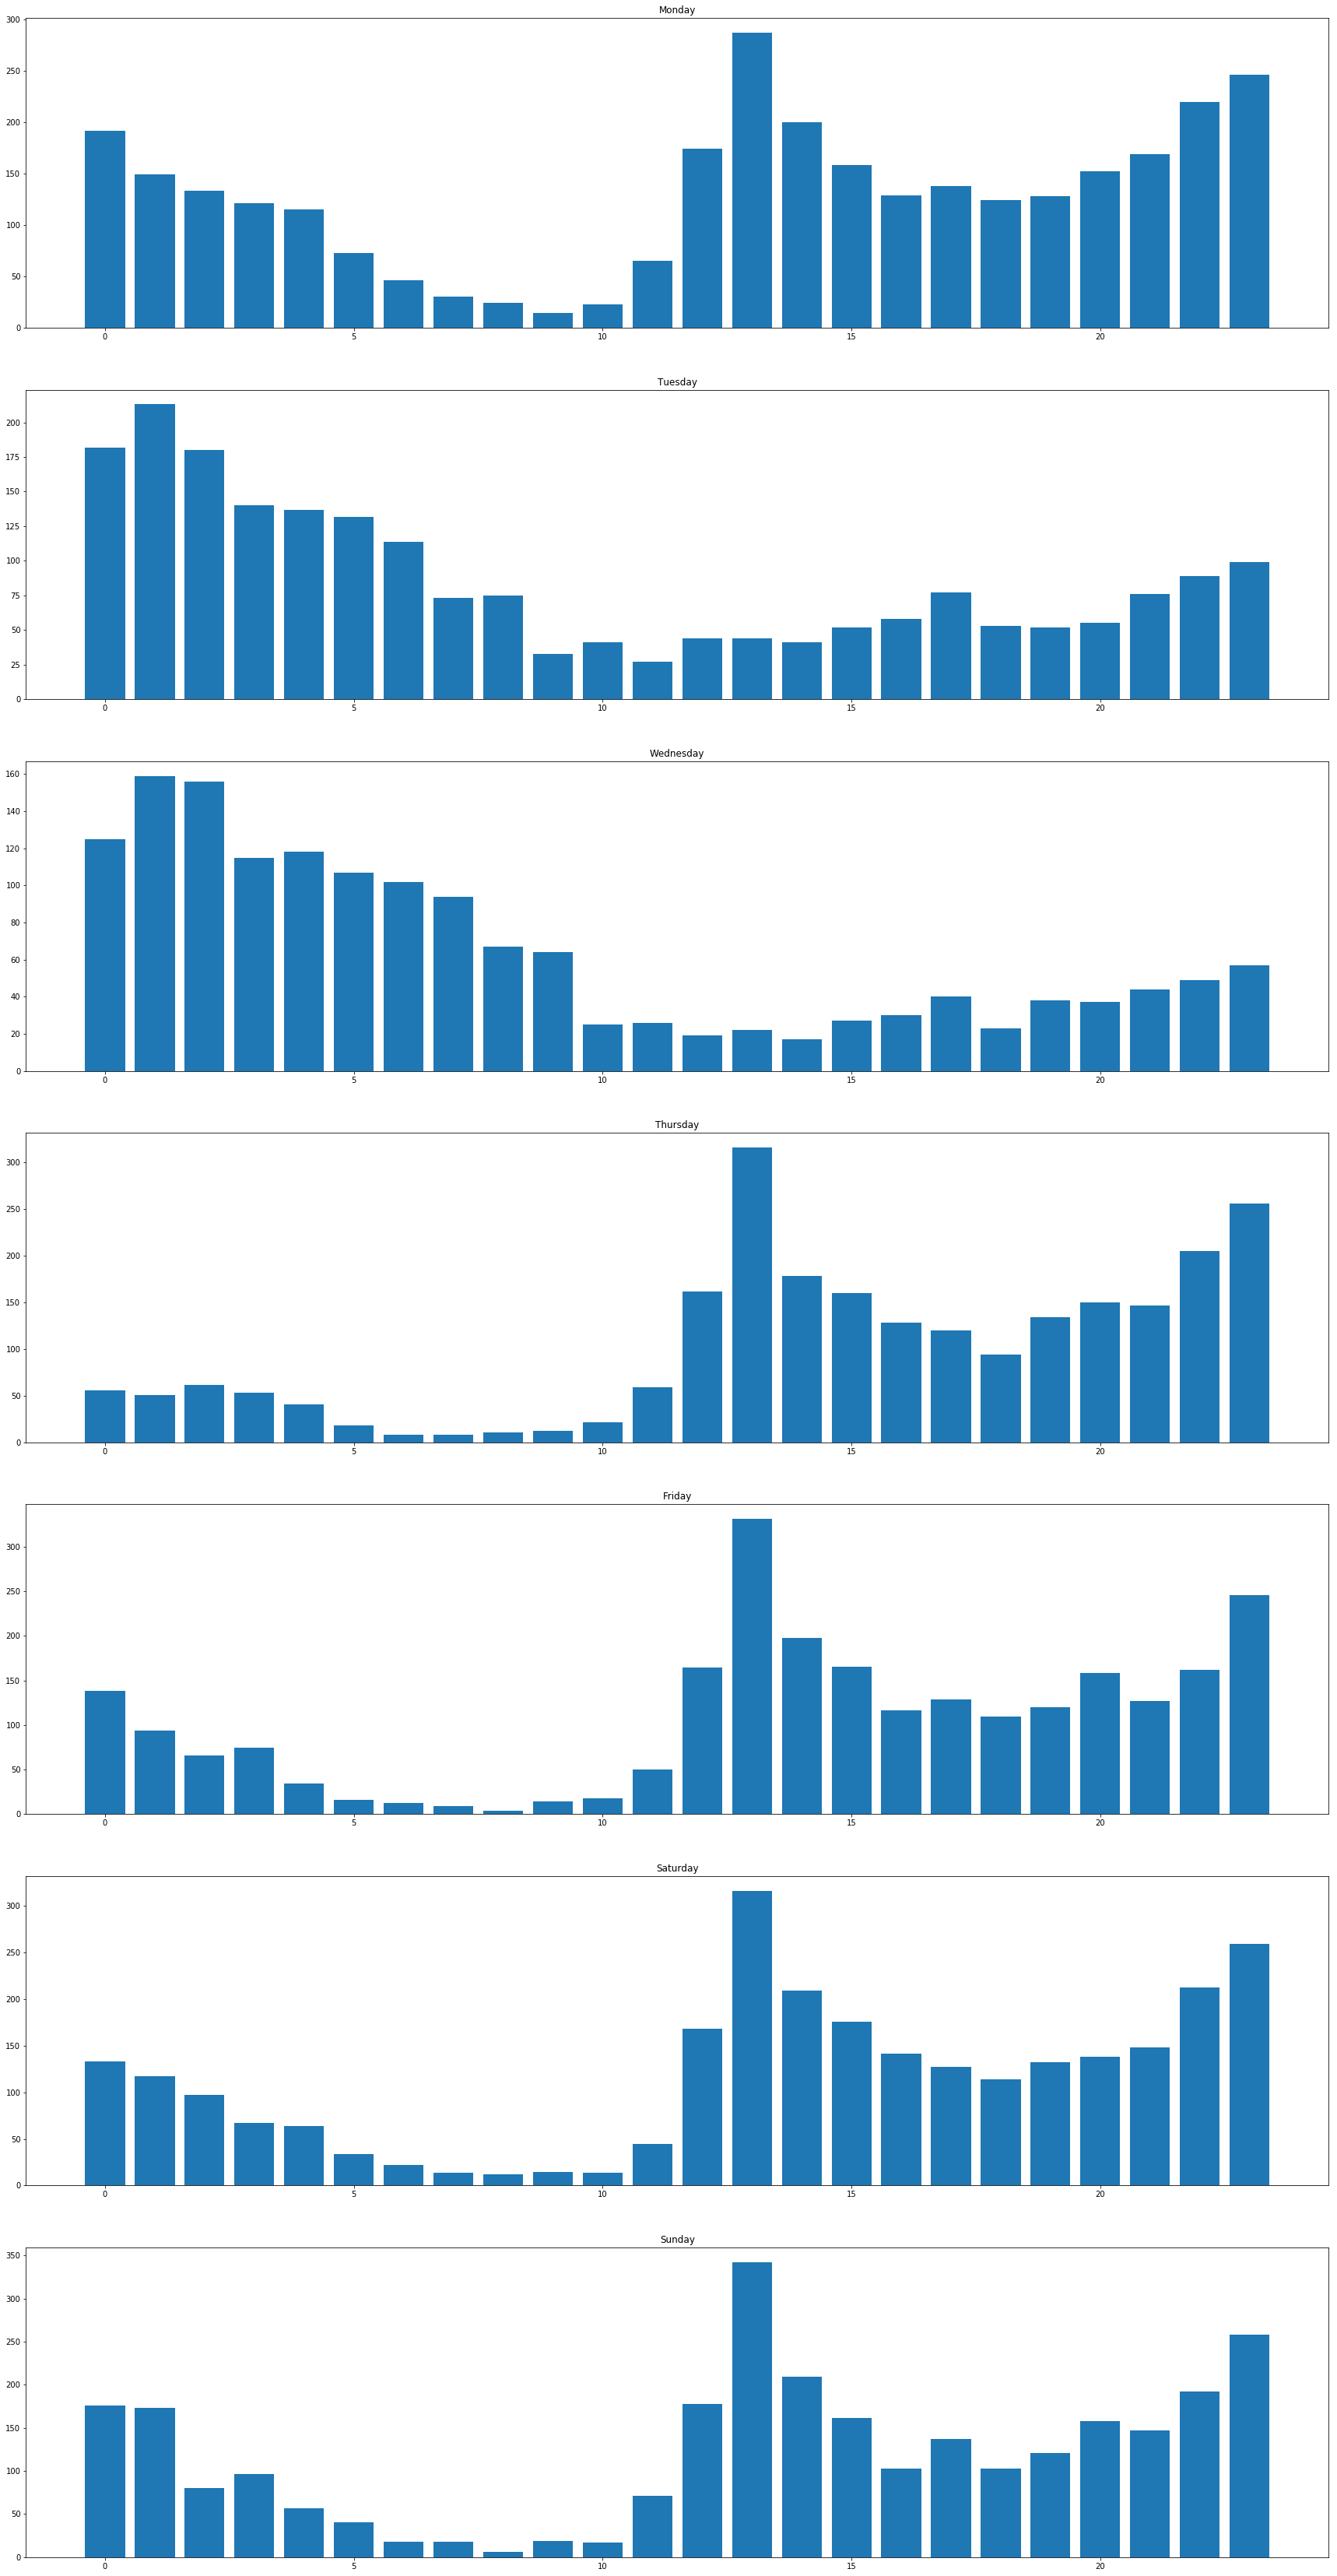

In [9]:
# Para este análisis me centraré en los viajes completados satisfactoriamente. 
# De los demás casos nos encargaremos más adelante

def temp_analisis(df, time_col='start_at', filename='dia-hora.png'): 
    
    df_drop_off = df[df['end_state'] == 'drop off'] # Sólo los viajes cuyo 'end_state' = 'drop off'

    # Hacemos una agregación tipo 'count' agrupando por día de la semana. 
    # Para mejor visualización ordenamos los días de la semana por su orden natural. 

    week_df_count = df_drop_off.groupby(df_drop_off[time_col].dt.weekday_name).count()
    week_df_count = week_df_count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                           'Friday', 'Saturday', 'Sunday'])
    print("Hacemos una agregación tipo 'count' agrupando por día de la semana")
    display(week_df_count)

    # Hacemos una agregación tipo 'mean' agrupando por día de la semana. 
    # Para mejor visualización ordenamos los días de la semana por su orden natural. 

    week_df_mean = df_drop_off.groupby(df_drop_off[time_col].dt.weekday_name).mean()
    week_df_mean = week_df_mean.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                         'Friday', 'Saturday', 'Sunday'])
    
    print("Hacemos una agregación tipo 'mean' agrupando por día de la semana.")
    display(week_df_mean)

    # No tiene mucho sentido estudiar los datos geogŕáficos de forma tan general. Lo único que obtendríamos
    # serían los puntos calientes cada día de la semana. 

    # Eliminamos las columnas que darán valores irrelevantes, como las correspondientes
    # a coordenadas GPS del viaje
    week_df_mean.drop(['start_lat', 'start_lon', 'end_lat', 'end_lon', 
                       'driver_start_lat', 'driver_start_lon'], 
                      axis=1)

    # Ahora un estudio más detallado según el día de la semana y la hora del día. 
    # Usamos la agregación count y así obtenemos el número de viajes completados

    times = pd.DatetimeIndex(df_drop_off[time_col])
    # times = times.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])

    data_day_hour = df_drop_off.groupby([times.weekday_name, times.hour]).journey_id.count()
    # data_day_hour = df_drop_off.groupby([times.weekday_name, times.hour]).count() # Para hacerlo con todos

    # reordenamos los índices por los días de la semana. Como es un multiindex hay que definir el nivel. 
    data_day_hour = data_day_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                           'Friday', 'Saturday', 'Sunday'], 
                                          level=0)
    df_day_hour = pd.DataFrame(data_day_hour)

    # Set multi-index names and columns
    df_day_hour.index.names = ['day','hour']
    df_day_hour.columns = ['quantity']
    # df_day_hour.head(40)


    df2 = df_day_hour.unstack()
    print("Tabla de uso de días de la semana contra horas del día")
    display(df2)
    

    # Representamos según día de la semana y horas de cada día para completar un análisis 
    # temporal del uso de la app

    f, axis = plt.subplots(7, 1, figsize=(30, 60)) #, sharex='col')
    for i, day in enumerate(df2.index): 
        axis[i].bar(x=range(24), height=df2.loc[day, 'quantity']) 
        axis[i].set_title(label=day) #, fontdict=fontdict)
        pass

    # Miércoles y Jueves parecen Sábado y Domingo. 
    print("Gráficas del uso de la aplicación a lo largo de los días de la semana")
    print("expresado en número total de viajes cada hora de cada día de la semana")
    f.show()
    f.savefig(os.path.join(output_folder, filename))

temp_analisis(df, time_col='start_at', filename='dia_de_semana_por_hora.png')

### Comentarios sobre el análisis temporal: 

Se pueden observar dos patrones en la gráfica de los 7 días de la semana: 
1. Tradicionalmente a lo largo de la semana los días siguen un patrón 5+2 (días laborables y fin de semana). En las gráficas que he obtenido el Miércoles y el Jueves son similares y los otros cinco días son similares entre sí. 
    * Puede que el método **dt.weekday_name** que empleo para obtener los días de la semana es incorrecto. Esto lo compruebo más adelante y funciona correctamente. 
    * Los datos que se me han proporcionado están falseados por alguna razón. Puede que se haya cambiado el dato del año. Donde aparece un Lunes debería ser un Viernes. Y Martes y Miércoles serían Sábado y Domingo. 
2. Los picos de uso a lo largo del día coinciden con las 13:00 y dado que el servidor de cabify se encuentra en Madrid puedo suponer un desfase Lima-Madrid de 7 horas. Estos datos los voy a modificar para progresar con el análisis

Para comprobar el buen funcionamiento de los métodos empleados para obtener el día de la semana hago uso de una función y un calendario. 
```
df_test = df.copy()
df_test['weekday'] = df_test.start_at.dt.weekday_name
df_test.head()
```

### Modificación del huso horario Lima-Madrid

In [10]:
# seleccionamos las columnas tipo datetime
times = df.select_dtypes(include='datetime').columns
huso_lima = -7
for col in times: 
    # creamos una columna nueva
    # Modificación de las columnas con timestamp para modificar según el huso de Lima
    df[col+'_lima'] = pd.DatetimeIndex(df[col]) + timedelta(hours=huso_lima, minutes=0)
df.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type            start_at  start_lat  start_lon  \
0  executive       asap 2010-11-16 16:44:52 -12.139835 -77.023560   
1  executive       asap 2010-06-01 00:34:38 -12.138748 -76.995361   
2  executive       asap 2010-05-31 05:01:24 -12.124531 -77.027802   
3  executive       asap 2010-06-01 00:29:30 -12.138851 -76.995300   
4  executive   reserved 2010-09-11 23:55:00 -12.089954 -76.926270   

               end_at         ...          duration    cost cost_distance  \
0 2010-11-16 17:29:57         ...             234.0     0.0           0.0   
1 2010-06-01 00:37:39         ...               0.0     0.0           NaN   
2 2010-05-31 05:04:34         ...               0.0     0.0           NaN   
3 2010-06-01 00:32:35         ...               0.0     0.0           NaN   
4 2010-09-12 01:07:02         ...             715.0  6173.0        5756.0   

   cost_duration  source driver_score rider_score       start_at_lima  \
0            0.0  iPhone          5.0         5.0 2010-11-16 09:44:52   
1            NaN  iPhone          NaN         NaN 2010-05-31 17:34:38   
2            NaN  iPhone          NaN         NaN 2010-05-30 22:01:24   
3            NaN  iPhone          NaN         NaN 2010-05-31 17:29:30   
4          417.0  iPhone          4.0         5.0 2010-09-11 16:55:00   

          end_at_lima     arrived_at_lima  
0 2010-11-16 10:29:57 2010-11-16 10:02:14  
1 2010-05-31 17:37:39                 NaT  
2 2010-05-30 22:04:34                 NaT  
3 2010-05-31 17:32:35                 NaT  
4 2010-09-11 18:07:02 2010-09-11 16:50:00  

[5 rows x 31 columns]

Hacemos una agregación tipo 'count' agrupando por día de la semana


journey_id  user_id  driver_id  taxi_id  icon  start_type  \
start_at_lima                                                              
Monday               3379     3379       3379     3379  3379        3379   
Tuesday              1871     1871       1871     1871  1871        1871   
Wednesday             968      968        968      968   968         968   
Thursday             2596     2596       2596     2596  2596        2596   
Friday               2654     2654       2654     2654  2654        2654   
Saturday             2880     2880       2880     2880  2880        2880   
Sunday               3069     3069       3069     3069  3069        3069   

               start_at  start_lat  start_lon  end_at       ...         \
start_at_lima                                               ...          
Monday             3379       3379       3379    3377       ...          
Tuesday            1871       1871       1871    1871       ...          
Wednesday           968        968        968     968       ...          
Thursday           2596       2596       2596    2596       ...          
Friday             2654       2654       2654    2652       ...          
Saturday           2880       2880       2880    2880       ...          
Sunday             3069       3069       3069    3069       ...          

               duration  cost  cost_distance  cost_duration  source  \
start_at_lima                                                         
Monday             3379  3167           3010           3010    3366   
Tuesday            1871  1794           1687           1687    1863   
Wednesday           968   933            857            857     962   
Thursday           2596  2444           2331           2331    2580   
Friday             2654  2495           2383           2383    2628   
Saturday           2880  2706           2554           2554    2875   
Sunday             3069  2906           2721           2721    3046   

               driver_score  rider_score  start_at_lima  end_at_lima  \
start_at_lima                                                          
Monday                 1411         3015           3379         3377   
Tuesday                 857         1738           1871         1871   
Wednesday               396          854            968          968   
Thursday               1104         2308           2596         2596   
Friday                 1193         2316           2654         2652   
Saturday               1317         2488           2880         2880   
Sunday                 1372         2671           3069         3069   

               arrived_at_lima  
start_at_lima                   
Monday                    3379  
Tuesday                   1870  
Wednesday                  968  
Thursday                  2596  
Friday                    2654  
Saturday                  2880  
Sunday                    3069  

[7 rows x 31 columns]

Hacemos una agregación tipo 'mean' agrupando por día de la semana.


start_lat  start_lon    end_lat    end_lon  driver_start_lat  \
start_at_lima                                                                 
Monday        -12.104403 -77.017119 -11.950190 -76.881336        -11.769370   
Tuesday       -12.109061 -77.016695 -12.012166 -76.961157        -12.068951   
Wednesday     -12.102495 -77.024830 -11.842116 -76.931371        -12.073575   
Thursday      -12.100617 -77.015556 -11.899643 -76.992641        -11.468148   
Friday        -12.102575 -77.016580 -11.913939 -77.072915        -11.619022   
Saturday      -12.102047 -77.017544 -11.912778 -76.759360        -11.516019   
Sunday        -12.101946 -77.018518 -11.903935 -76.817542        -11.723446   

               driver_start_lon        price  price_distance  price_duration  \
start_at_lima                                                                  
Monday               -74.881690  3582.324748     2725.626813      700.840189   
Tuesday              -76.709098  3848.432924     3170.807590      577.414751   
Wednesday            -76.768926  4534.165631     3860.686983      525.211777   
Thursday             -72.983846  3463.684900     3793.184900      704.054314   
Friday               -73.924636  3281.990954     3015.493595      670.251319   
Saturday             -73.280401  3479.638416     6363.422022      770.597430   
Sunday               -74.563483  3456.727273     4176.282502      688.039101   

                   distance    duration         cost  cost_distance  \
start_at_lima                                                         
Monday          8541.895531  842.786623  2854.984528    1779.637209   
Tuesday         9935.623196  694.036879  3940.160535    2180.326023   
Wednesday      12150.137397  628.441116  4714.336549    2602.736289   
Thursday       14687.380200  852.870955  3642.790917    2104.129129   
Friday         10897.865109  817.501884  2564.305812    1517.038187   
Saturday       24848.564236  932.333333  4315.173688    3866.891543   
Sunday         16543.016944  830.810036  3350.792154    3010.337376   

               cost_duration  driver_score  rider_score  
start_at_lima                                            
Monday            469.087375      3.832743     4.740299  
Tuesday           417.807943      4.008168     4.720944  
Wednesday         365.379230      4.063131     4.692037  
Thursday          451.547405      3.932971     4.776430  
Friday            433.098196      3.922883     4.775907  
Saturday          535.014096      3.993166     4.781752  
Sunday            464.365674      3.904519     4.755148

Tabla de uso de días de la semana contra horas del día


quantity                                          ...             \
hour            0   1   2   3   4    5    6    7    8    9  ...    14   15   
day                                                         ...              
Monday          30  24  14  23  65  174  287  200  158  129 ...   169  220   
Tuesday         73  75  33  41  27   44   44   41   52   58 ...    76   89   
Wednesday       94  67  64  25  26   19   22   17   27   30 ...    44   49   
Thursday         8  11  12  22  59  162  316  178  160  128 ...   147  205   
Friday           9   4  14  18  50  164  331  198  165  116 ...   127  162   
Saturday        14  12  15  14  45  168  316  209  176  141 ...   148  212   
Sunday          18   6  19  17  71  178  342  209  161  103 ...   147  192   

                                                   
hour        16   17   18   19   20   21   22   23  
day                                                
Monday     246  182  213  180  140  137  132  114  
Tuesday     99  125  159  156  115  118  107  102  
Wednesday   57   56   51   62   53   41   18    8  
Thursday   256  138   94   66   74   34   16   12  
Friday     246  133  117   97   67   64   34   22  
Saturday   259  176  173   80   96   57   40   18  
Sunday     258  192  149  133  121  115   73   46  

[7 rows x 24 columns]

Gráficas del uso de la aplicación a lo largo de los días de la semana
expresado en número total de viajes cada hora de cada día de la semana


/home/alberto/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


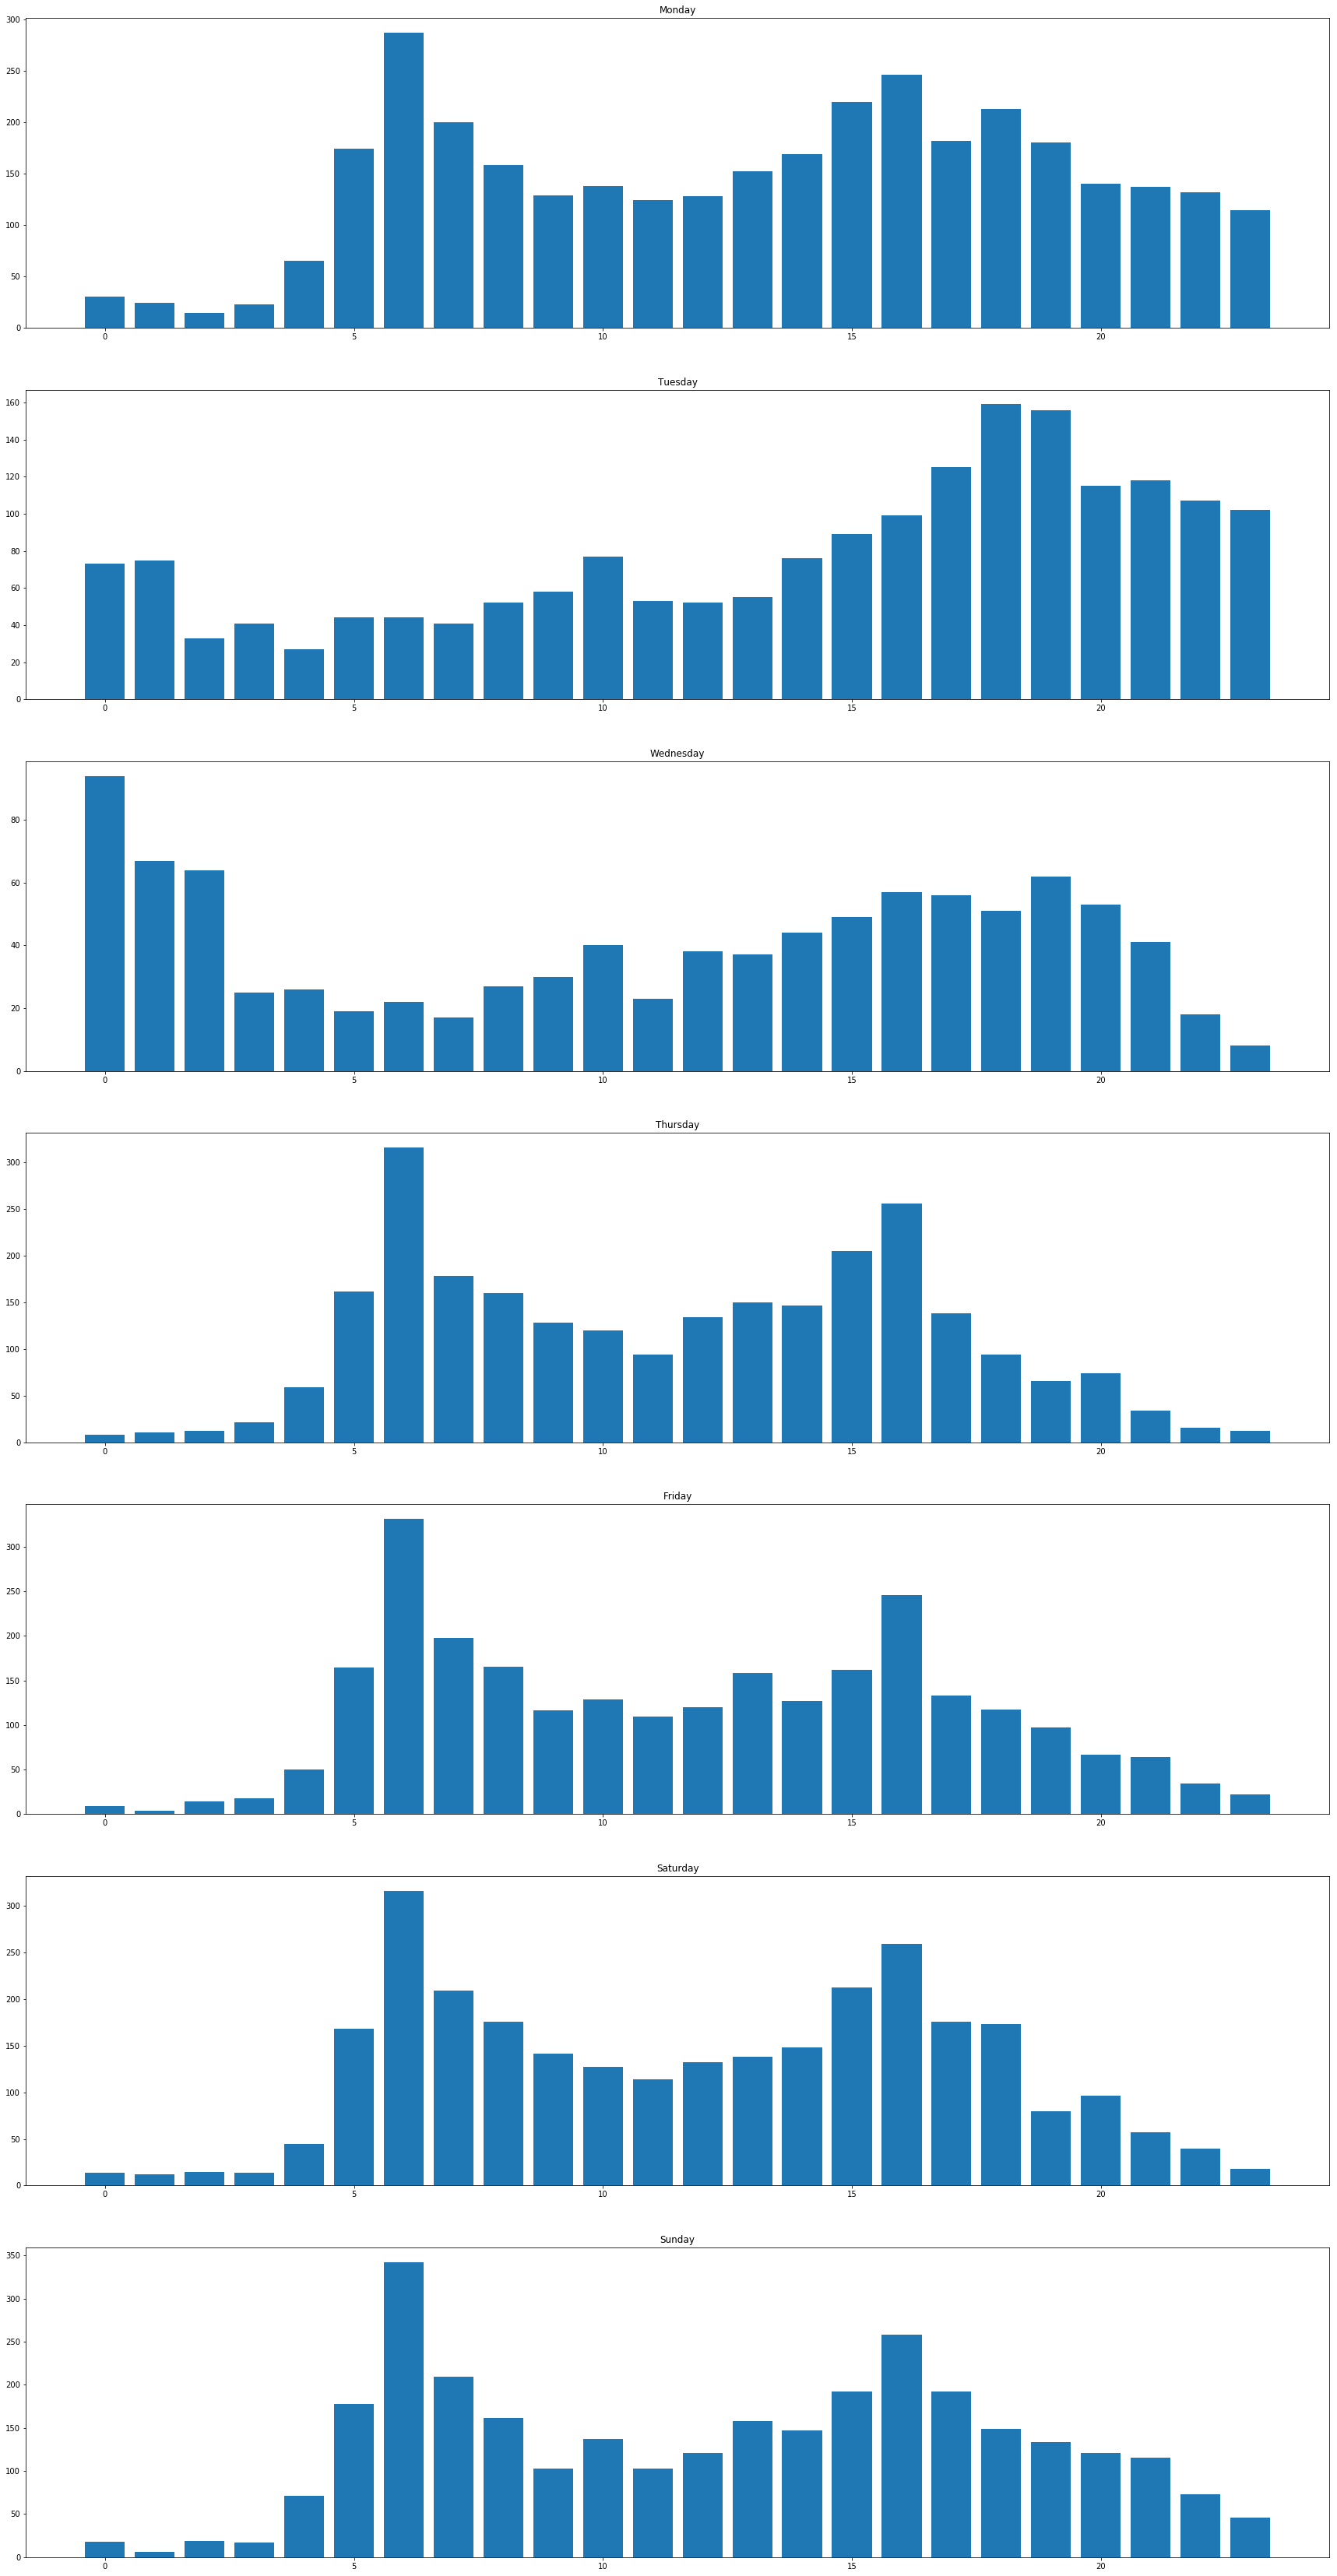

In [11]:
temp_analisis(df, time_col='start_at_lima', filename='dia_de_semana_por_hora_huso_lima.png')



## A descriptive data analysis.

### 1. how many? (e.g: vehicles, riders, drivers)

In [12]:
def analize_how_many(data, columnas): 
    how_many = pd.DataFrame(columns=['atribute', 'quantity'])
    # columnas = columnas 
    # ['user_id', 'driver_id', 'taxi_id', 'icon', 'start_type']

    for col in columnas: 
        how_many = how_many.append({'atribute': col, 'quantity': df[col].unique().size}, ignore_index=True)

    return how_many

In [13]:
# Dierentes opciones entre los valores categóricos del dataset

columnas = ['user_id', 'driver_id', 'taxi_id', 'icon', 'start_type', 'currency', 'source']
analize_how_many(df, columnas)

atribute quantity
0     user_id     1390
1   driver_id      169
2     taxi_id      214
3        icon        3
4  start_type        3
5    currency        1
6      source        6

### 2. when? (e.g: journeys/price/cost per time period, are the journeys quick?

In [14]:
# Número de viajes en db según el mes. Esto debe estár mal

# monthly_journeys = df.groupby(df['start_at'].dt.strftime('%B'))['journey_id'].count().sort_values()
# monthly_journeys
meses = ['January', 'February', 'March', 'April','May', 'June', 
         'July', 'August','September', 'October', 'November', 'December']

monthly_journeys = df.groupby(df['start_at_lima'].dt.strftime('%B'))['journey_id'].count()
monthly_journeys.index = pd.CategoricalIndex(monthly_journeys.index, 
                                             categories=meses)
monthly_journeys = monthly_journeys.sort_index()
monthly_j = pd.DataFrame(monthly_journeys)
# monthly_j.index = 'Month'
monthly_j.index.name = 'Months'
monthly_j.columns = ['Journeys']
display(monthly_j)


Journeys
Months             
January         579
February        774
March           982
April          1466
May            1598
June           1910
July           1522
August         2125
September      2593
October        3275
November       3015
December       3272

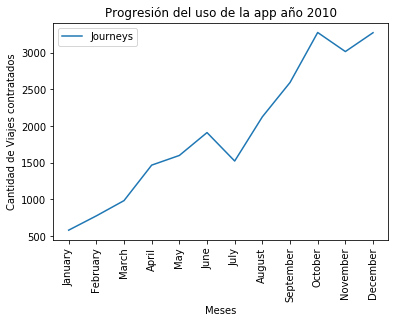

In [15]:
monthly_j.plot.line(title='Progresión del uso de la app año 2010')
plt.xlabel('Meses')
plt.ylabel('Cantidad de Viajes contratados')
plt.xticks(range(12), meses, rotation=90)
plt.savefig(os.path.join(output_folder, 'uso app anual.png'))
plt.show()

# La curva no es monótona creciente debido a la pendienten decreciente de Noviembre y Julio. 
# Empezar en 500 viajes mes de Enero y terminal el año con más de 3000 me da a pensar que este año 2010 fue 
# el primero en implantarse en Lima Cabify

In [16]:
# agrupando por meses, los usuarios diferentes que no tienen nulos

monthly_users = df.dropna(axis=0, subset=['user_id']).groupby(df['start_at_lima'].dt.strftime('%B'))['user_id'].nunique()
monthly_users.index = pd.CategoricalIndex(monthly_users.index, 
                                             categories=meses)
monthly_users = monthly_users.sort_index()
monthly_u = pd.DataFrame(monthly_users)
monthly_u.index.name = 'Months'
monthly_u.columns = ['Users']
monthly_u

Users
Months          
January      103
February     112
March        159
April        257
May          275
June         302
July         317
August       380
September    412
October      443
November     505
December     563

In [17]:
# Ahora juntamos ambos datasets para poder comparar

df3 = monthly_j.merge(monthly_u, on='Months')
df3['ratio_journey_user'] = df3['Journeys'] / df3['Users']
df3

# Aunque el número de usuarios de la plataforma se va incrementando con el paso del tiempo, los usuarios
# activos siempre utilizan cabify entre 4-6 veces al mes. No parece que lo necesiten más de estas veces. 

Journeys  Users  ratio_journey_user
Months                                        
January         579    103            5.621359
February        774    112            6.910714
March           982    159            6.176101
April          1466    257            5.704280
May            1598    275            5.810909
June           1910    302            6.324503
July           1522    317            4.801262
August         2125    380            5.592105
September      2593    412            6.293689
October        3275    443            7.392777
November       3015    505            5.970297
December       3272    563            5.811723

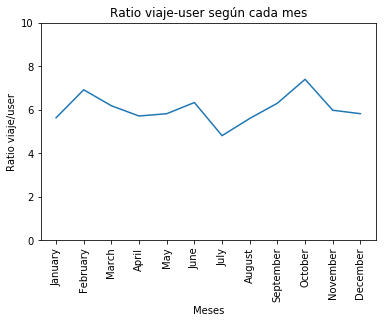

In [18]:
df3['ratio_journey_user'].plot(kind='line', ylim=(0, 10))
plt.title('Ratio viaje-user según cada mes')
plt.ylabel('Ratio viaje/user')
plt.xlabel('Meses')
plt.xticks(range(12), meses, rotation=90)
plt.savefig(os.path.join(output_folder, 'Ratio viaje-user.png'))

plt.show()

### 3. what? (e.g: reservations/asap, vehicle type)

In [19]:
# vamos a ver los valores únicos y su frecuencia de cada una de las columnas que parezca necesario. 

cat_columns = [k for k, v in df.nunique().items() if v < 10]
for col in cat_columns: 
    print(col.upper())
    print(df[col].value_counts(), end='\n'*3)
 

ICON
executive    22737
group          239
easy           135
Name: icon, dtype: int64


START_TYPE
asap        14865
reserved     8226
delayed        20
Name: start_type, dtype: int64


END_STATE
drop off         17417
rider cancel      3976
not found         1145
driver cancel      292
failure            249
no show             20
Name: end_state, dtype: int64


CURRENCY
PEN    23111
Name: currency, dtype: int64


SOURCE
iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64


DRIVER_SCORE
5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: driver_score, dtype: int64


RIDER_SCORE
5.0    13404
4.0     1359
0.0      352
3.0      213
1.0       32
2.0       30
Name: rider_score, dtype: int64




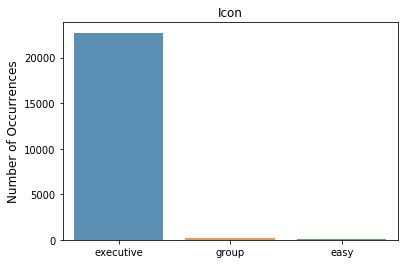

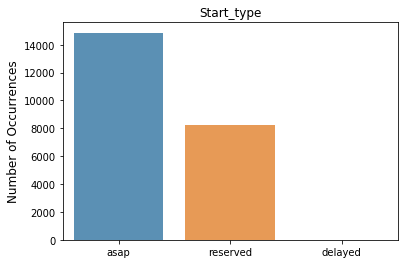

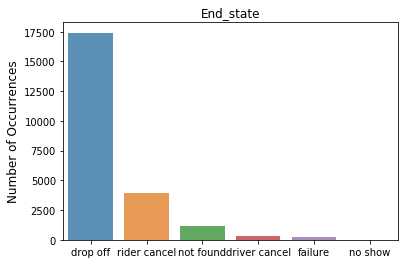

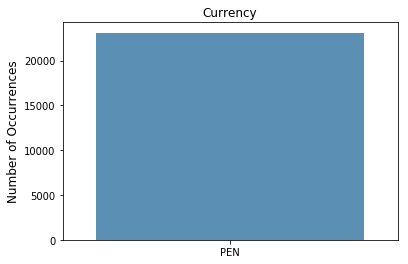

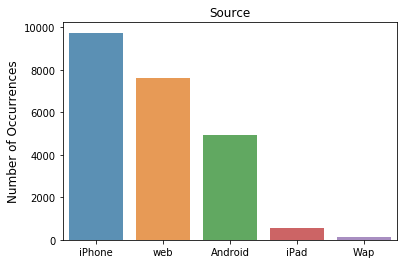

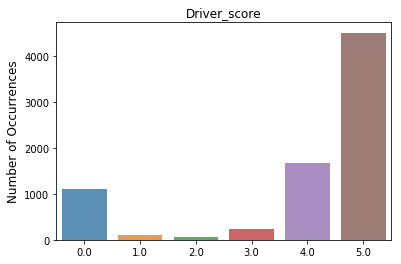

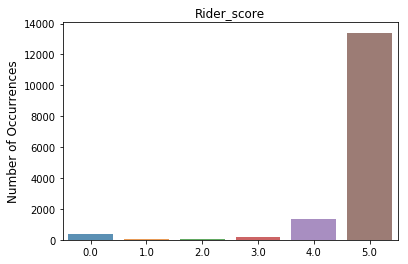

In [20]:
# y de forma gráfica

for col in cat_columns: 
    sns.barplot(df[col].value_counts().index, df[col].value_counts().values, alpha=0.8)
    plt.title('{}'.format(col.capitalize()))
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.savefig(os.path.join(output_folder, 'Number of occurrences - {}.png'.format(col)))

    plt.show()

### 4. where? (e.g: origin map, best origins)

In [21]:
# TO DO En tableau

### 5. who? (e.g: worst riders, best drivers)

In [22]:
# best and worst riders/drivers

def analize_best_worst(data, columna, score, number_of_elements=20, best=True): 
    df = pd.DataFrame(data.groupby(columna)[score].mean()).dropna()
    return df.sort_values(by=score, ascending=not best).head(number_of_elements)

In [23]:
columnas = ['user_id', 'driver_id']
scores = ['rider_score', 'driver_score']

for col, score in zip(columnas, scores): 
    df_temp1 = analize_best_worst(df, col,score, number_of_elements=20, best=True)
    df_temp2 = analize_best_worst(df, col,score, number_of_elements=20, best=False)
    display(df_temp1, df_temp2)

rider_score
user_id                                      
8842ece0c6fb65eb4499f76c51cea1b7          5.0
9cb0ce4ebefaba511db0badba05ad866          5.0
9cfcb63cf9bc63b557eeddf25980d918          5.0
9cfcb63cf9bc63b557eeddf259813c60          5.0
9d8b2d6f27b2c5d3d54219ecc6842d5d          5.0
9db6243faff23197787d1efc5f94042b          5.0
9f5290bea3d2df4cff9041e935d0d831          5.0
9f5290bea3d2df4cff9041e935f4c9af          5.0
a08c8fde8f3bb17ddad8dd8da3351590          5.0
a08c8fde8f3bb17ddad8dd8da335e093          5.0
a1306821dc56831e07dadc8b34f00238          5.0
a142ea0ecdc8a0f61ef28bd0898e38ed          5.0
a142ea0ecdc8a0f61ef28bd089939f0b          5.0
a142ea0ecdc8a0f61ef28bd089a4a738          5.0
a142ea0ecdc8a0f61ef28bd089a61603          5.0
a142ea0ecdc8a0f61ef28bd089a8fe67          5.0
a142ea0ecdc8a0f61ef28bd089b55aad          5.0
a29b9d9ad4d76006b0ec544bc10f04cb          5.0
a37ccff55ca3cff97b19b45ab2d84599          5.0
a4ec23eee7d76e6081bf5269a59440ad          5.0

rider_score
user_id                                      
5cad427fb6e68da9e87d07900d6de244          0.0
35e9968bb54e4382c317cdc06985c45d          0.0
5cad427fb6e68da9e87d07900d6c9f78          0.0
1ae49761b92727c765d5d502736532db          0.0
879cf7da2f43c0f8e09069c3d76b8d12          0.0
d8cdfb21982ddce4e217ba50044c2099          0.0
e80aa8d4a9cf19e49fcb1197d828c8c0          0.0
59cbac79f5a653e8a8eb10f0ca4afdae          0.0
2f074f125e1652e02799c064c2febad5          0.0
65b6f3b7075270499ddd0f1dc10dc222          0.0
c9d489ec975d21e098f1f13e26bbe6d7          0.0
157dbc9cfa6656e3b5e6bce5dca9bb2e          0.0
1f045a6f9a422abfdcf50e5d06990044          0.0
efc4144cf211cd22df86b505b8bec443          0.0
cf8869924d60fb7a73ea96073561487b          2.5
8be8536e9c01313271be66882057684f          2.5
e79a8cbc68660e66be0be925d4ff69f5          2.5
a86217dc9fc6e34f29bbbcc62973cafa          2.5
bf16712f63aa85f390d9eddc1f1947e2          2.5
be2d7041cb5bae52cf3edaaf036f152b          2.5

driver_score
driver_id                                     
883360491194dd3b866c897b2589118c      5.000000
784a730957c6e05508e71c604ac92700      5.000000
6149ad309c203f14b7f56a106a9b32c6      5.000000
6149ad309c203f14b7f56a106a9a3938      5.000000
5ecedc9ef1c775232764e9f7b0140505      5.000000
b4f2c132de1648fecf41bb1651525c91      5.000000
a4dbb03efa4c2a99bbbb852350f65810      5.000000
bb790ea51a0aff0f6d6e11020933c37c      5.000000
d4253c42617542d43396c0d01e4dbdc2      5.000000
fc308d768d77788c726b74fd5e4868bf      5.000000
bc5c1ae63a528f0371154594b3477211      5.000000
bf0f0845b5094fda2fcdac195ece97ad      5.000000
9448070ece760ea5386e5d48221464e9      5.000000
fdba41f4b66d90ed7863fce32b97a19f      4.866667
13f9089105129d9278966aaca4a520df      4.833333
3235be59a59d4257895b663ab9a315bd      4.818182
cd6fba80de11849ce566009f41dd27a0      4.800000
12c472dd8efc6ed622ae8669251b82f1      4.680000
17c21284245ff240c7212732991c37ac      4.675676
ecdcce0c956e266ed26c80fd9e5cbb8f      4.590909

driver_score
driver_id                                     
7bf79d646d318c67421797bb50001810      0.000000
fdf6154b59555655a8734629d4c65698      0.000000
e4cae9e711f3aa4ce90ed98f28186565      0.000000
f8cd07f929f6884cd5fea893f4da3461      0.000000
b3ba9cda1b124b4fdc5d639f2417ca3e      0.000000
5f3cd1befe5e96f2324cfbb14c4d4433      0.000000
b3ba9cda1b124b4fdc5d639f2416a9ca      0.000000
58af3d0a68980e98b9cc7d5383ec84d1      0.000000
5060ebbf9acef4e4e616e575a3bd5f0f      0.000000
1dcab4d408234e9ecb7e110708a25f64      0.000000
54b4de3c953be7d11a1ea3e2b545181d      0.333333
4c37542f88f6bc6fb2465a93be1dc97e      0.833333
acf45a789a8ff88fb94179627131d87c      0.833333
8cb98e46b27af1e6fca8768a2a6329f3      1.000000
b5821eaaa5d49fb2936ff5b0ffa34a35      1.100000
587ea1ea1ab415acb010ec8308275095      1.500000
ec84a73745199ff840ecafcb927f1b0b      1.666667
f78d50ea4f0c83a4a302d9fa82249d1e      1.666667
eac81a33ab23504c8ee6373ffc8111af      2.000000
8a122c8845dc5eebe7d584eb30428057      2.333333

In [24]:
df.columns

Index(['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
       'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon',
       'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at',
       'currency', 'price', 'price_distance', 'price_duration', 'distance',
       'duration', 'cost', 'cost_distance', 'cost_duration', 'source',
       'driver_score', 'rider_score', 'start_at_lima', 'end_at_lima',
       'arrived_at_lima'],
      dtype='object')